In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import scikitplot as skplt

import sklearn
from sklearn.datasets import load_digits, load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('/data/notebook_files/ro_freq_sd_mean.csv')
df.head()

,chip,chipinstance,sd_freq,mean,label
0,Chip1,C1I1,17.361956,220.55,0
1,Chip1,C1I2,16.164158,206.20,1
2,Chip1,C1I3,15.573616,199.25,1
3,Chip1,C1I4,15.307514,194.80,1
4,Chip1,C1I5,15.079042,190.85,1


In [4]:
df['sd_freq'] = df['sd_freq']
df['m_freq'] = df['mean']
# del df['sd_freq']
del df['mean']
print(df)

       chip chipinstance    sd_freq  label  m_freq
0     Chip1         C1I1  17.361956      0  220.55
1     Chip1         C1I2  16.164158      1  206.20
2     Chip1         C1I3  15.573616      1  199.25
3     Chip1         C1I4  15.307514      1  194.80
4     Chip1         C1I5  15.079042      1  190.85
..      ...          ...        ...    ...     ...
795  Chip32       C32I21  13.473585      1  176.75
796  Chip32       C32I22  13.118594      1  170.35
797  Chip32       C32I23  12.648715      1  163.90
798  Chip32       C32I24  12.617349      1  163.35
799  Chip32       C32I25  16.564722      0  215.10

[800 rows x 5 columns]


Text(0, 0.5, 'm_freq')

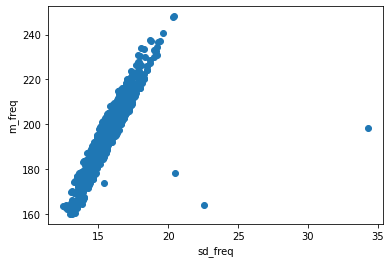

In [5]:
plt.scatter(df['sd_freq'],df['m_freq'])
plt.xlabel('sd_freq')
plt.ylabel('m_freq')

In [6]:
df0 = pd.DataFrame(df.loc[df['label'] == 0])
df1 = pd.DataFrame(df.loc[df['label'] == 1])

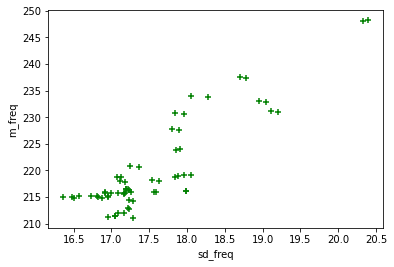

In [7]:
plt.xlabel('sd_freq')
plt.ylabel('m_freq')
plt.scatter(df0['sd_freq'], df0['m_freq'],color="green",marker='+')

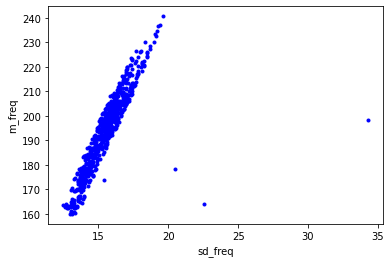

In [8]:
plt.xlabel('sd_freq')
plt.ylabel('m_freq')
# plt.scatter(df0['freq'], df0['values'],color="green",marker='+')
plt.scatter(df1['sd_freq'], df1['m_freq'],color="blue",marker='.')

In [9]:
sse = []
k_rng = range(1,9)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sd_freq','m_freq']])
    sse.append(km.inertia_)

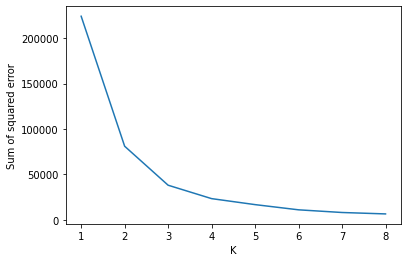

In [10]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [11]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['sd_freq','m_freq']])
y_predicted

In [12]:
df['cluster']=y_predicted
df.head()

,chip,chipinstance,sd_freq,label,m_freq,cluster
0,Chip1,C1I1,17.361956,0,220.55,3
1,Chip1,C1I2,16.164158,1,206.20,0
2,Chip1,C1I3,15.573616,1,199.25,0
3,Chip1,C1I4,15.307514,1,194.80,2
4,Chip1,C1I5,15.079042,1,190.85,2


In [13]:
km.cluster_centers_

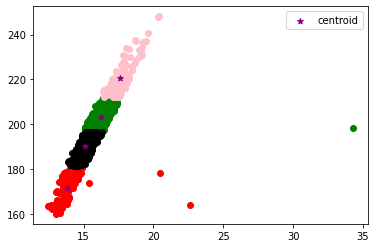

In [14]:
df10 = df[df.cluster==0]
df20 = df[df.cluster==1]
df30 = df[df.cluster==2]
df40 = df[df.cluster==3]
# df50 = df[df.cluster==4]
# df60 = df[df.cluster==5]
plt.scatter(df10['sd_freq'],df10['m_freq'],color='green')
plt.scatter(df20['sd_freq'],df20['m_freq'],color='red')
plt.scatter(df30['sd_freq'],df30['m_freq'],color='black')
plt.scatter(df40['sd_freq'],df40['m_freq'],color='pink')
# plt.scatter(df50['sd_freq'],df50['m_freq'],color='cyan')
# plt.scatter(df60['sd_freq'],df60['m_freq'],color='gray')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [15]:
df

,chip,chipinstance,sd_freq,label,m_freq,cluster
0,Chip1,C1I1,17.361956,0,220.55,3
1,Chip1,C1I2,16.164158,1,206.20,0
2,Chip1,C1I3,15.573616,1,199.25,0
3,Chip1,C1I4,15.307514,1,194.80,2
4,Chip1,C1I5,15.079042,1,190.85,2
...,...,...,...,...,...,...
795,Chip32,C32I21,13.473585,1,176.75,1
796,Chip32,C32I22,13.118594,1,170.35,1
797,Chip32,C32I23,12.648715,1,163.90,1
798,Chip32,C32I24,12.617349,1,163.35,1


In [16]:
import os  
os.makedirs('/data/notebook_files/test', exist_ok=True)  
df.to_csv('/data/notebook_files/test/out.csv')  

In [17]:
df0 = pd.DataFrame(df.loc[df['label'] == 0])

In [18]:
import os  
os.makedirs('/data/notebook_files/test', exist_ok=True)  
df0.to_csv('/data/notebook_files/test/golden.csv')

In [19]:
df1 = pd.DataFrame(df.loc[df['label'] == 1])

In [20]:
os.makedirs('/data/notebook_files/test', exist_ok=True)  
df1.to_csv('/data/notebook_files/test/trojan.csv')  

In [21]:
df['predicted'] = df['cluster']
df

,chip,chipinstance,sd_freq,label,m_freq,cluster,predicted
0,Chip1,C1I1,17.361956,0,220.55,3,3
1,Chip1,C1I2,16.164158,1,206.20,0,0
2,Chip1,C1I3,15.573616,1,199.25,0,0
3,Chip1,C1I4,15.307514,1,194.80,2,2
4,Chip1,C1I5,15.079042,1,190.85,2,2
...,...,...,...,...,...,...,...
795,Chip32,C32I21,13.473585,1,176.75,1,1
796,Chip32,C32I22,13.118594,1,170.35,1,1
797,Chip32,C32I23,12.648715,1,163.90,1,1
798,Chip32,C32I24,12.617349,1,163.35,1,1


In [22]:
df['predicted'] = df['predicted'].replace([0,2], 1)
df['predicted'] = df['predicted'].replace([3], 0)

In [23]:
df

,chip,chipinstance,sd_freq,label,m_freq,cluster,predicted
0,Chip1,C1I1,17.361956,0,220.55,3,0
1,Chip1,C1I2,16.164158,1,206.20,0,1
2,Chip1,C1I3,15.573616,1,199.25,0,1
3,Chip1,C1I4,15.307514,1,194.80,2,1
4,Chip1,C1I5,15.079042,1,190.85,2,1
...,...,...,...,...,...,...,...
795,Chip32,C32I21,13.473585,1,176.75,1,1
796,Chip32,C32I22,13.118594,1,170.35,1,1
797,Chip32,C32I23,12.648715,1,163.90,1,1
798,Chip32,C32I24,12.617349,1,163.35,1,1


In [24]:
y_test = df.label
y_pred_class = df.predicted

In [25]:
dfz = df['label'].value_counts()
print(dfz)

1    736
0     64
Name: label, dtype: int64


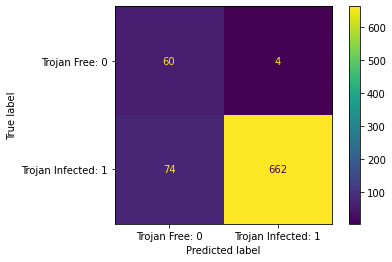

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_class)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Trojan Free: 0','Trojan Infected: 1'])
cmd.plot()

In [27]:
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
TPR = TP/(TP + FN)
TNR = TN/(TN + FP)
FNR = FN/(FN + TP)
FPR = FN/(FN + TN)

print(TN)
print(cm)
result = [TPR, TNR, FNR, FPR]
print(result)

60
[[ 60   4]
 [ 74 662]]
[0.8994565217391305, 0.9375, 0.10054347826086957, 0.5522388059701493]


In [28]:
acc = (TP + TN)/(TP + TN + FP + FN)
precision = TP/(TP + FP)
print("The accuracy of the model is", acc)
print("The precision of the model is", precision)

The accuracy of the model is 0.9025
The precision of the model is 0.993993993993994


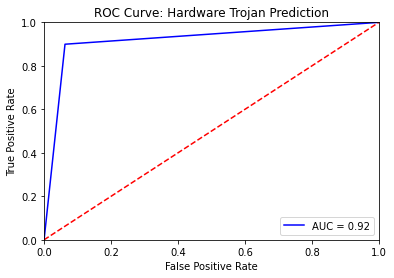

In [35]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_class)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve: Hardware Trojan Prediction')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
#ROC is the plot of true positive rate against false positive rate at various classification threshold. AUC is the area under the ROC curve, and higher AUC indicates better model performance.

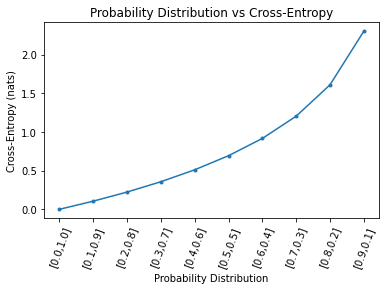

In [39]:

# cross-entropy for predicted probability distribution vs label
from math import log
from matplotlib import pyplot
 
# calculate cross-entropy
def cross_entropy(p, q, ets=1e-15):
	return -sum([p[i]*log(q[i]+ets) for i in range(len(p))])
 
# define the target distribution for two events
target = [0.0, 1.0]
# define probabilities for the first event
probs = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
# create probability distributions for the two events
dists = [[1.0 - p, p] for p in probs]
# calculate cross-entropy for each distribution
ents = [cross_entropy(target, d) for d in dists]
# plot probability distribution vs cross-entropy
pyplot.plot([1-p for p in probs], ents, marker='.')
pyplot.title('Probability Distribution vs Cross-Entropy')
pyplot.xticks([1-p for p in probs], ['[%.1f,%.1f]'%(d[0],d[1]) for d in dists], rotation=70)
pyplot.subplots_adjust(bottom=0.2)
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Cross-Entropy (nats)')
pyplot.show()